In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


In [5]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
X=np.array([[a,b] for a,b in zip(data['age'],data['campaign'])])
X

array([[56,  1],
       [57,  1],
       [37,  1],
       ...,
       [56,  2],
       [44,  1],
       [74,  3]])

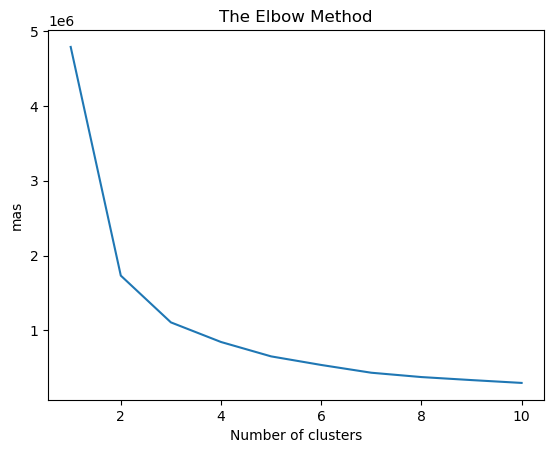

In [8]:
# метод локтя
from sklearn.cluster import KMeans
mas = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 52)
    kmeans.fit(X)
    mas.append(kmeans.inertia_)
plt.plot(range(1, 11), mas)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mas')
plt.show()

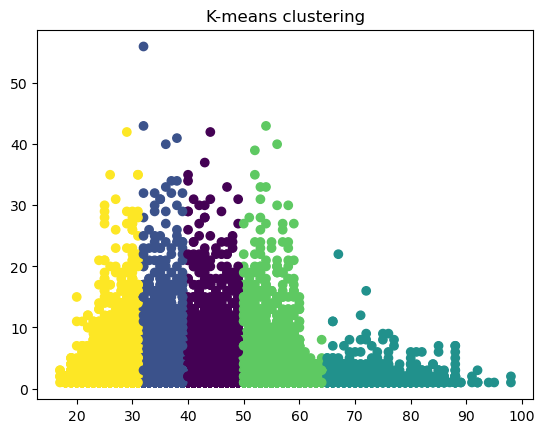

In [9]:
# кластеризация методом k-means
kmean = KMeans(n_clusters = 5)
kmean = kmean.fit(X)
clusters = kmean.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_16756\3377057685.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


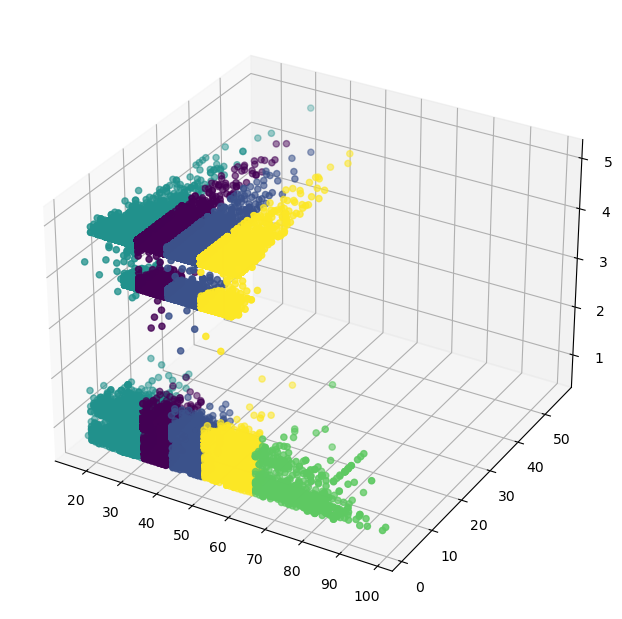

In [11]:
#кластеризация методом k-means 

fig = plt.figure(1,figsize = (8,6))
plt.clf()
ax = Axes3D(fig)
X=np.array([[a,b,c] for a,b,c in zip(data['age'],data['campaign'],data['euribor3m'])])
k_means = KMeans(n_clusters = 5)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

ax.scatter(X[:,0],X[:,1], X[:,2], c = clusters)

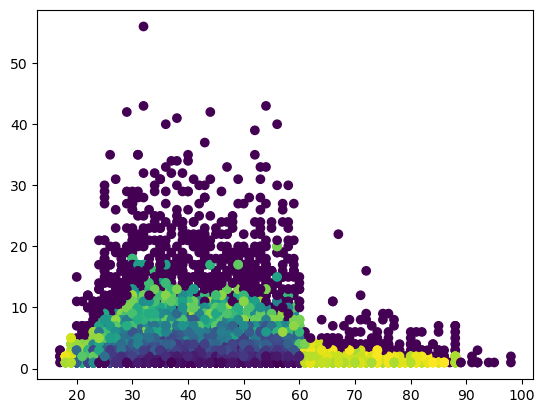

In [12]:
from sklearn.cluster import DBSCAN

X=np.array([[a,b] for a,b in zip(data['age'],data['campaign'])])
dbscan = DBSCAN(eps=0.2, min_samples=4)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_16756\3228923279.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


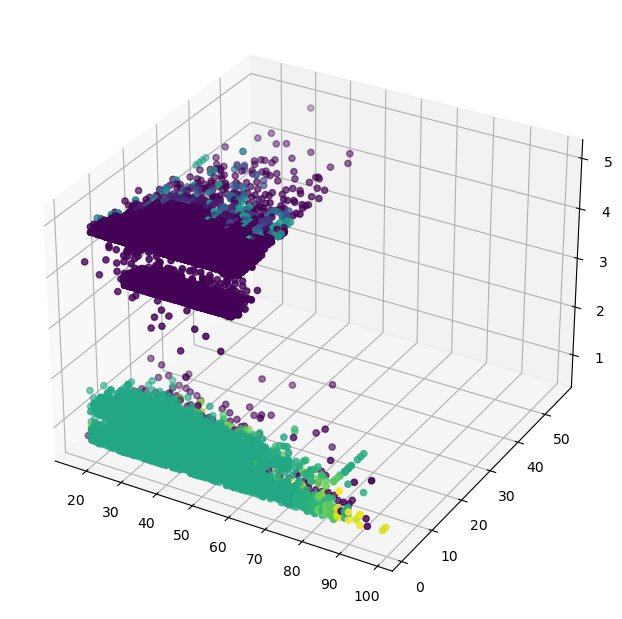

In [13]:
#кластеризация методом dbscan для трёх переменных 
fig = plt.figure(1,figsize = (8,6))
plt.clf()
ax = Axes3D(fig)
X=np.array([[a,b,c] for a,b,c in zip(data['age'],data['campaign'],data['euribor3m'])])
dbscan = DBSCAN(eps=1, min_samples=2)
clusters = dbscan.fit_predict(X)

ax.scatter(X[:,0],X[:,1], X[:,2], c = clusters)

<AxesSubplot:>

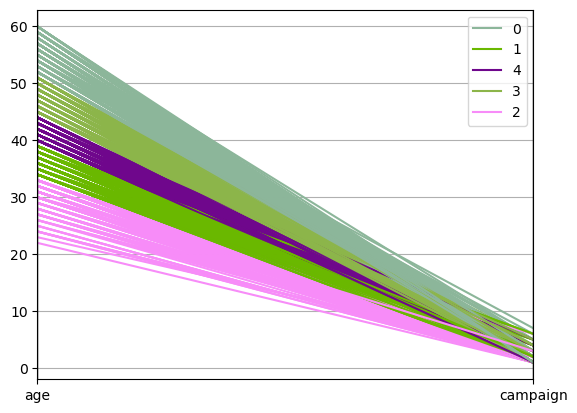

In [14]:
#график в параллельных координатах для обеих кластеризаций
data_parallel = data[['age','campaign']][0:1000]
k_means = KMeans(n_clusters = 5, random_state = 0).fit_predict(data_parallel)
k = {"k_means": k_means}
df_kmeans = pd.DataFrame(k)
df_kmeans1 = pd.concat([data_parallel,df_kmeans],axis = 1)
df_kmeans1.rename(columns = {df_kmeans1.columns[2]:'Cluster'} ,inplace = True)
pd.plotting.parallel_coordinates(df_kmeans1,'Cluster')

<AxesSubplot:>

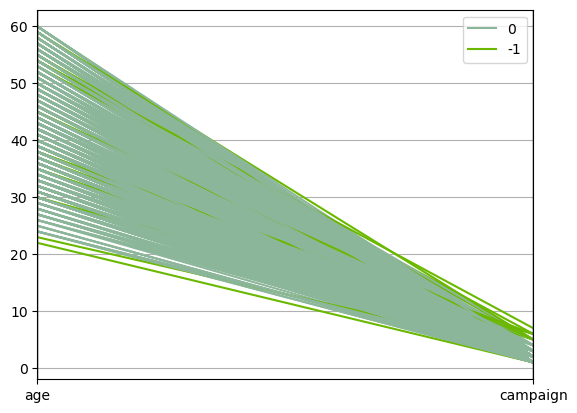

In [15]:
dbscan1 = DBSCAN(eps = 1, min_samples = 5).fit_predict(data_parallel)
db = {"dbscan": dbscan1}
df_dbscan = pd.DataFrame(db)
df_dbscan1 = pd.concat([data_parallel,df_dbscan],axis = 1)
df_dbscan1.rename(columns = {df_dbscan1.columns[2]:'Cluster'} ,inplace = True)
pd.plotting.parallel_coordinates(df_dbscan1,'Cluster')

<AxesSubplot:>

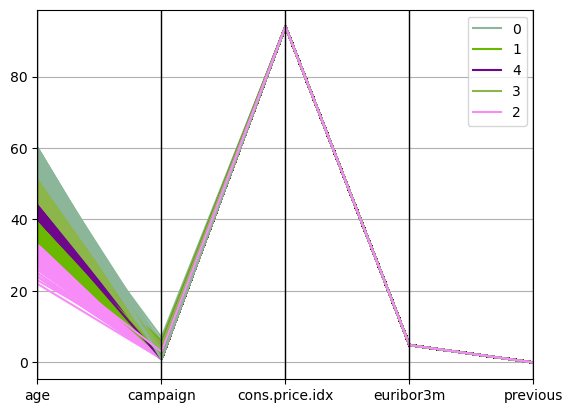

In [22]:
#кластеризация с пятью переменными (одна из них категориальная)
#метод k-means
data_new = data[['age','campaign','cons.price.idx','euribor3m','previous']][0:1000]
k_means = KMeans(n_clusters = 5, random_state = 0).fit_predict(data_new)
k = {"k_means": k_means}
df_kmeans = pd.DataFrame(k)
df_kmeans1 = pd.concat([data_new,df_kmeans],axis = 1)
df_kmeans1.rename(columns = {df_kmeans1.columns[5]:'Cluster'} ,inplace = True)
pd.plotting.parallel_coordinates(df_kmeans1,'Cluster')

<AxesSubplot:>

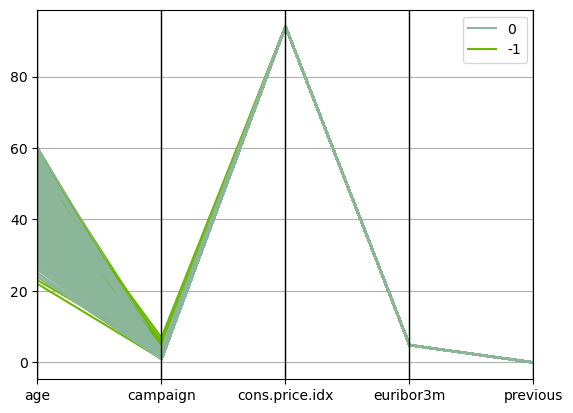

In [23]:
#метод dbscan
dbscan1 = DBSCAN(eps = 1, min_samples = 5).fit_predict(data_new)
db = {"dbscan": dbscan1}
df_dbscan = pd.DataFrame(db)
df_dbscan1 = pd.concat([data_new,df_dbscan],axis = 1)
df_dbscan1.rename(columns = {df_dbscan1.columns[5]:'Cluster'} ,inplace = True)
pd.plotting.parallel_coordinates(df_dbscan1,'Cluster')

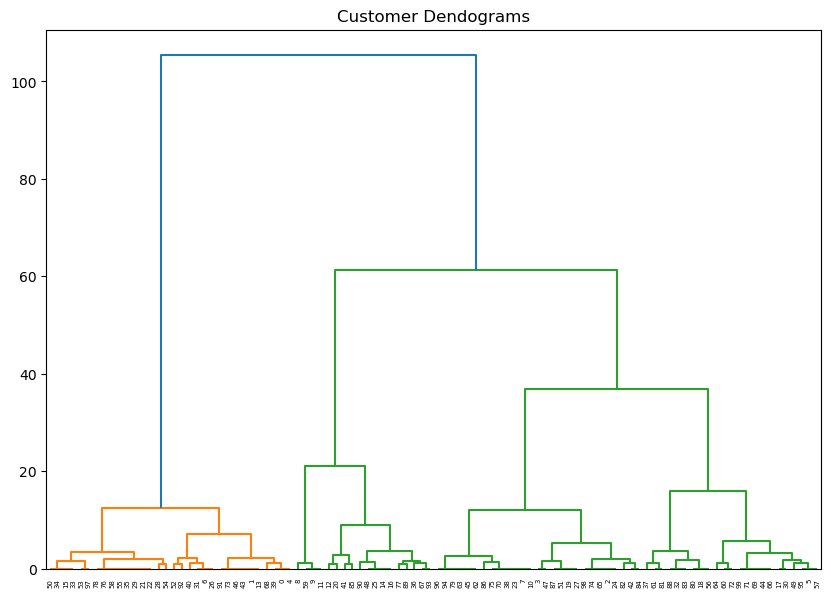

In [24]:
#Иерархическая кластеризация с двумя переменными
import scipy.cluster.hierarchy as shc

X=np.array([[a,b] for a,b in zip(data['age'],data['campaign'])][0:100])
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))